In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\adity\Documents\machine learning\Linear Regression\Datasets\Real_Estate.csv')
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [3]:
df.shape

(414, 7)

In [4]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


## **Data Cleaning**


In [6]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
df.duplicated().sum()   

np.int64(0)

In [8]:
df['year']=pd.DatetimeIndex(df['Transaction date']).year
df.head

<bound method NDFrame.head of                Transaction date  House age  \
0    2012-09-02 16:42:30.519336       13.3   
1    2012-09-04 22:52:29.919544       35.5   
2    2012-09-05 01:10:52.349449        1.1   
3    2012-09-05 13:26:01.189083       22.2   
4    2012-09-06 08:29:47.910523        8.5   
..                          ...        ...   
409  2013-07-25 15:30:36.565239       18.3   
410  2013-07-26 17:16:34.019780       11.9   
411  2013-07-28 21:47:23.339050        0.0   
412  2013-07-29 13:33:29.405317       35.9   
413  2013-08-01 09:49:41.506402       12.0   

     Distance to the nearest MRT station  Number of convenience stores  \
0                             4082.01500                             8   
1                              274.01440                             2   
2                             1978.67100                            10   
3                             1055.06700                             5   
4                              967.40000       

In [9]:
num = df.drop(columns=['Transaction date','Latitude','Longitude'],axis=1)
num

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,year
0,13.3,4082.01500,8,6.488673,2012
1,35.5,274.01440,2,24.970725,2012
2,1.1,1978.67100,10,26.694267,2012
3,22.2,1055.06700,5,38.091638,2012
4,8.5,967.40000,6,21.654710,2012
...,...,...,...,...,...
409,18.3,170.12890,6,29.096310,2013
410,11.9,323.69120,2,33.871347,2013
411,0.0,451.64190,8,25.255105,2013
412,35.9,292.99780,5,25.285620,2013


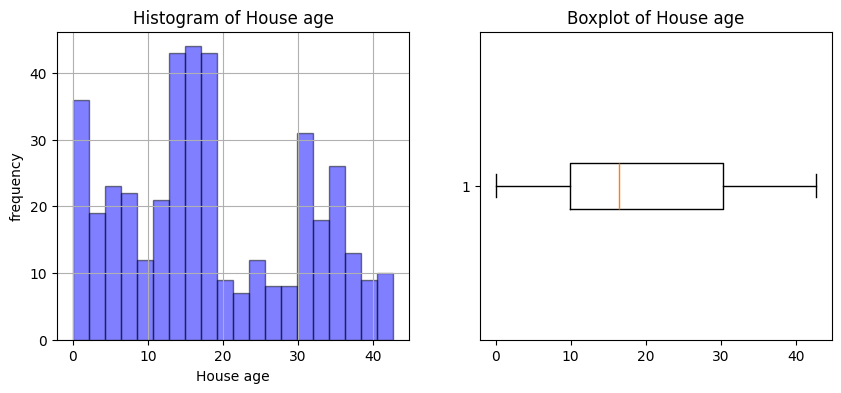

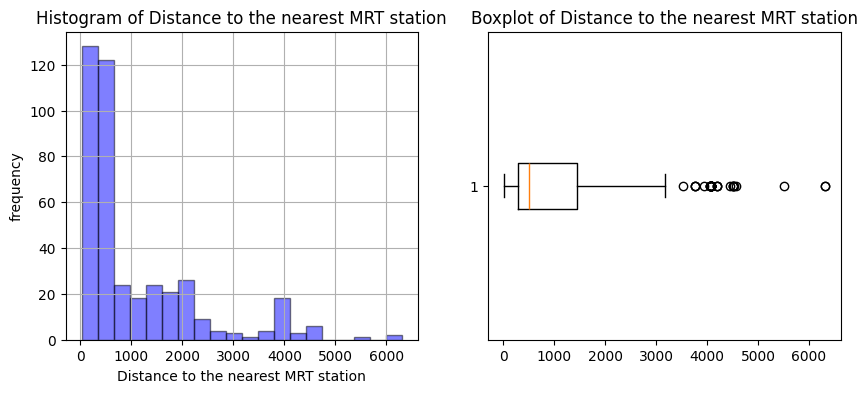

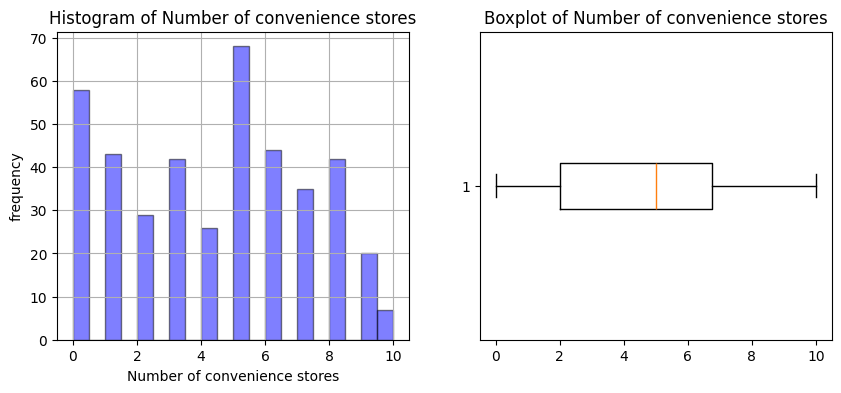

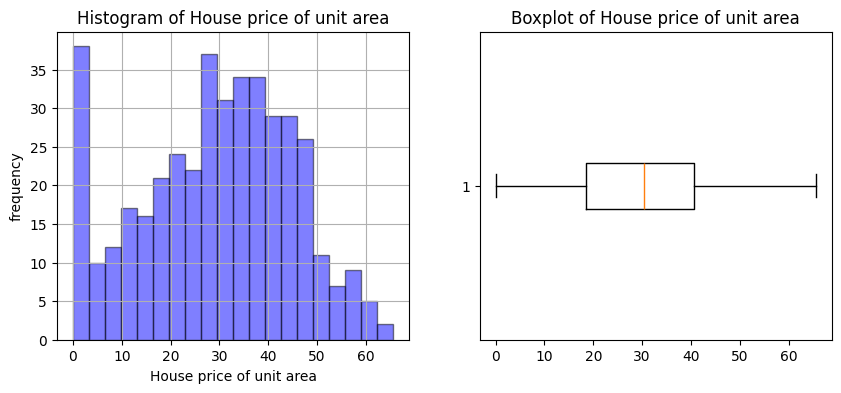

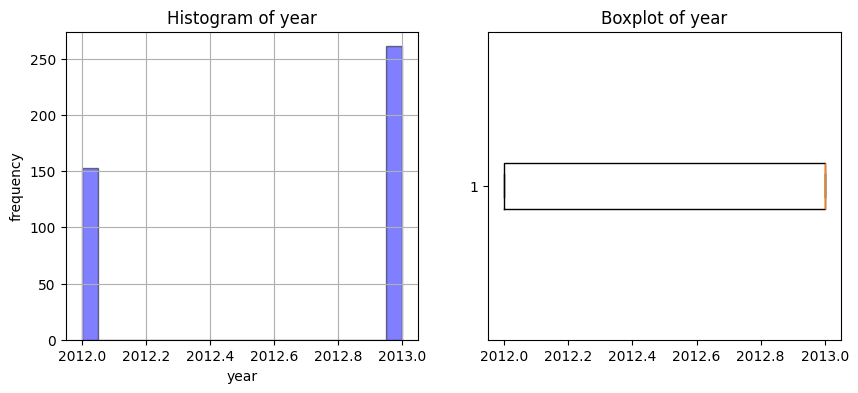

In [10]:
for i in num.columns:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    df[i].hist(bins=20,alpha=0.5,color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('frequency')
    
    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)
    plt.title(f'Boxplot of {i}')
    
    plt.show()
    

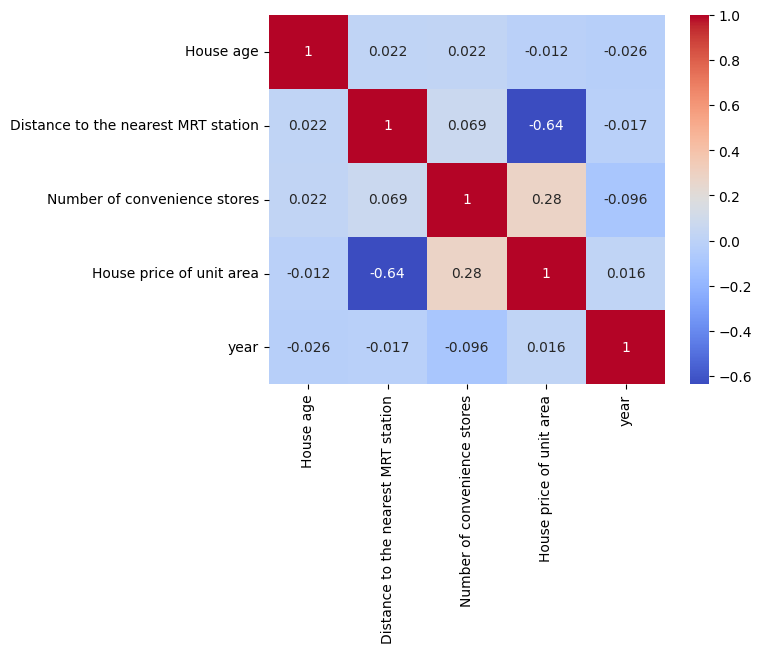

In [11]:
corr = num.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## **Model Building**

In [12]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'year'],
      dtype='object')

In [13]:
x = df[['Distance to the nearest MRT station']]
y = df[['House price of unit area']]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
x_test

,Distance to the nearest MRT station
358,431.1114
350,1360.1390
373,250.6310
399,208.3905
369,1414.8370
...,...
31,1828.3190
283,815.9314
157,3171.3290
203,4197.3490


In [17]:
y_pred = model.predict(x_test)
y_pred

array([[33.78462636],
       [26.40030431],
       [35.21916436],
       [35.55491052],
       [25.96554043],
       [33.54625099],
       [25.68825903],
       [35.55491052],
       [35.78491221],
       [ 7.2306015 ],
       [34.9923031 ],
       [29.54303405],
       [19.5926783 ],
       [33.91310338],
       [35.72109814],
       [34.8824143 ],
       [36.49230559],
       [31.50197449],
       [33.37411556],
       [33.1373267 ],
       [33.37411556],
       [34.63873733],
       [33.52144072],
       [33.37411556],
       [20.14299664],
       [32.43538627],
       [15.94951784],
       [23.59853413],
       [34.16480749],
       [27.38253304],
       [35.85424408],
       [35.96939237],
       [35.67259516],
       [34.91160893],
       [34.91160893],
       [33.68112174],
       [17.58146017],
       [35.85903064],
       [34.10688004],
       [34.10369113],
       [32.12730942],
       [36.37821333],
       [ 4.76563065],
       [ 4.76563065],
       [35.73741391],
       [33

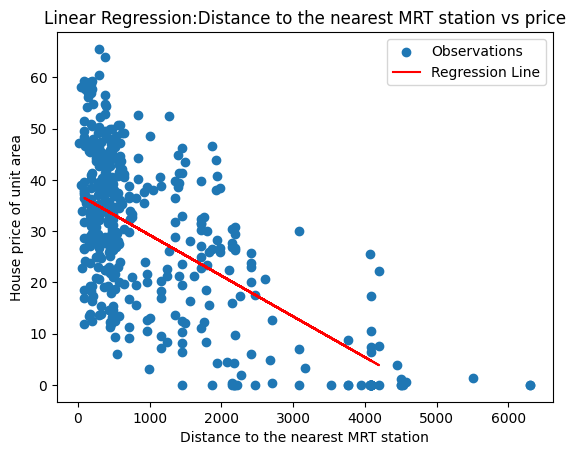

In [18]:
plt.scatter(df['Distance to the nearest MRT station'],df['House price of unit area'],label='Observations')

plt.plot(x_test['Distance to the nearest MRT station'],y_pred,color='r',label='Regression Line')

plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.title('Linear Regression:Distance to the nearest MRT station vs price')

plt.legend()

plt.show()

In [19]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print('Evaluation Metrics:')

print(f"mean_squared_error (MSE) : {mse:.2f}")
print(f"mean_absolute_error (MAE) : {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Evaluation Metrics:
mean_squared_error (MSE) : 148.27
mean_absolute_error (MAE) : 10.1545
R-squared (R2): 0.4640


In [20]:
import statsmodels.api as sm

In [21]:
x=sm.add_constant(x)
x

,const,Distance to the nearest MRT station
0,1.0,4082.01500
1,1.0,274.01440
2,1.0,1978.67100
3,1.0,1055.06700
4,1.0,967.40000
...,...,...
409,1.0,170.12890
410,1.0,323.69120
411,1.0,451.64190
412,1.0,292.99780


In [22]:
model = sm.OLS(y,x).fit()

In [23]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.404
Method:                       Least Squares   F-statistic:                     280.7
Date:                      Mon, 17 Feb 2025   Prob (F-statistic):           2.01e-48
Time:                              15:21:39   Log-Likelihood:                -1620.7
No. Observations:                       414   AIC:                             3245.
Df Residuals:                           412   BIC:                             3254.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [24]:
y_pred = model.predict(x)
y_pred

0       3.820248
1      35.724805
2      21.442687
3      29.180915
4      29.915415
         ...    
409    36.595188
410    35.308598
411    34.236589
412    35.565756
413    37.262711
Length: 414, dtype: float64

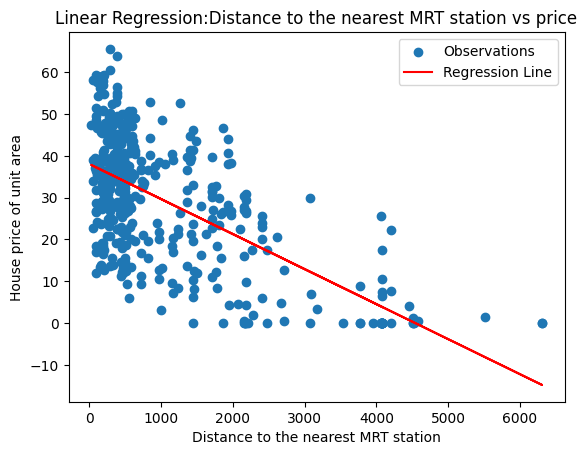

In [25]:
plt.scatter(df['Distance to the nearest MRT station'],df['House price of unit area'],label='Observations')

plt.plot(df['Distance to the nearest MRT station'],y_pred,color='r',label='Regression Line')

plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.title('Linear Regression:Distance to the nearest MRT station vs price')

plt.legend()

plt.show()

In [26]:
df["Distance to the nearest MRT station"].max()

np.float64(6306.153)

In [27]:
new_data=[1,100]
prediction=model.predict([new_data])
print(f"Predicted value:{prediction[0]}")

Predicted value:37.18274906180843
